# Exercise 4.9 - Part 2

## Importing Libraries and the new data set from part 1

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Importing the new data set using a path

In [2]:
path = r'C:\Users\chris\Desktop\Upskilling\CareerFoundry\Data Immersion\Achievement 4\08-2025 Instacart Basket Analysis'

In [3]:
df_ords_prods_custs = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'order_products_customers.pkl'))

<Axes: ylabel='Frequency'>

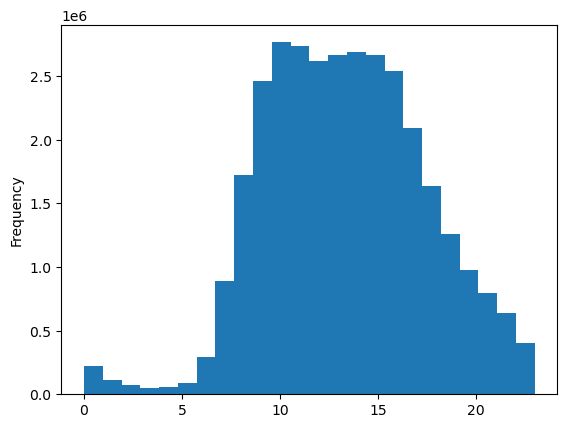

In [7]:
df_ords_prods_custs ['order_hour_of_day'].plot.hist(bins = 24)

The histogram above shows the frequency of orders at the time of day. It is clear to see that the frequency of order have a normal distribution. It demonstrates that the highest number of orders are placed between 9am and 5pm, and the lowest numbers of orders placed are placed between midnight and 7am. The peak hour for orders 10am.

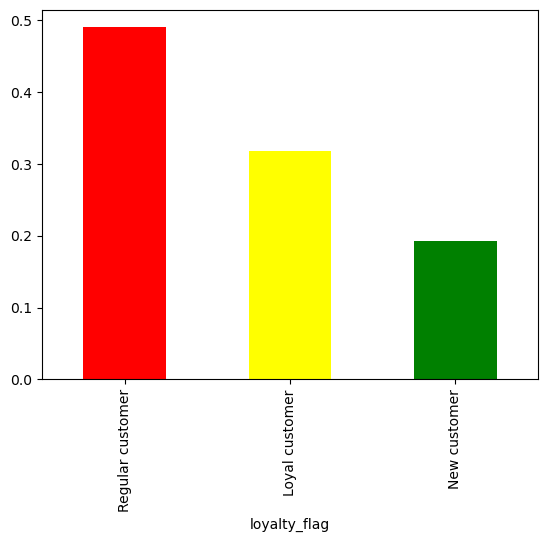

In [12]:
bar = df_ords_prods_custs['loyalty_flag'].value_counts('order_id').plot.bar(color =['red', 'yellow', 'green'])

Identifying the number of unique orders per customer group

In [22]:
df_ords_prods_custs.groupby("loyalty_flag")["order_id"].nunique()

loyalty_flag
Loyal customer      1024571
New customer         637101
Regular customer    1553202
Name: order_id, dtype: int64

Creating a new df for this unique orders list

In [19]:
df_ords_by_loyalty = df_ords_prods_custs.groupby("loyalty_flag")["order_id"].nunique()

Creating a bar chart from this new df

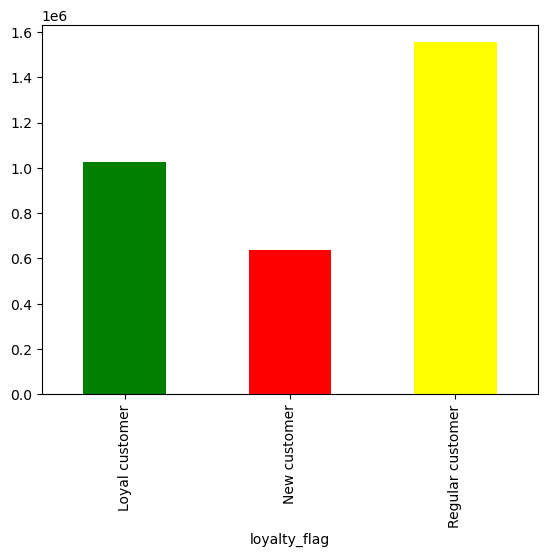

In [21]:
bar = df_ords_by_loyalty.plot.bar(color =['green', 'red', 'yellow'])

This bar chart showing the number of unique orders made per customer group, demonstrates that Regular customers place more individual orders than the other two customer groups. New customers make the fewest orders

Creating a list holding True/False values according to the random generation (70% = True, 30% = False)

In [24]:
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_custs)) <= 0.7

Storing the 70% sample as big and the 30% sample as small

In [25]:
big = df_ords_prods_custs[dev]
small = df_ords_prods_custs[~dev]

Creating a df (from the sample) with just the columns/variables needed for the chart

In [27]:
df_2 = small[['order_hour_of_day','prices']]

Creating a line chart to demonstrate prices against the hour of day

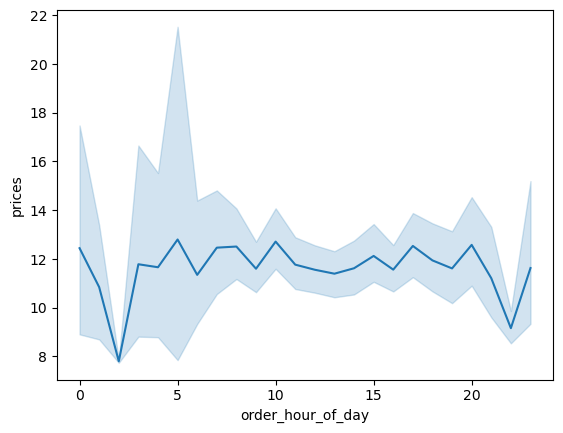

In [28]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

Creating a line chart to demonstrate number of dependents against age

In [31]:
df_3 = small[['Age','n_dependants']]

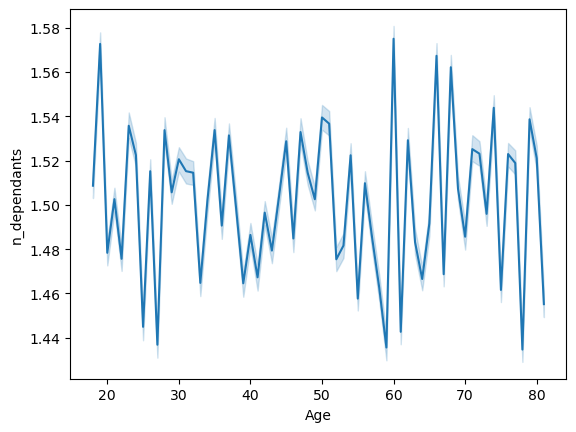

In [32]:
line2 = sns.lineplot(data = df_3, x = 'Age',y = 'n_dependants')

The line charts shows that in the sample data there is no corelation between the number of dependants and age. It seems that there are customers who are older with dependants and also younger customers with fewer dependants

In [35]:
df_4 = small[['Age','income']]

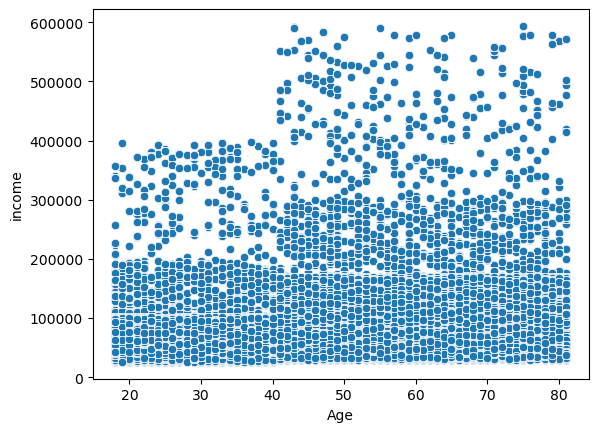

In [36]:
scatter = sns.scatterplot(data = df_4, x = 'Age',y = 'income')

This scatterplot demonstrates a corelation with age and income. It would show that customer over 40 would have higher incomes and therefore higher spending power than those under 40. There is still quite a concentration of customers 40/45+ who have an income of upto 200000, however ther are many more customers over 40 that have higher incomes than those under 40 with incomes of between 200k and 400k.

## Exporting the visualisations

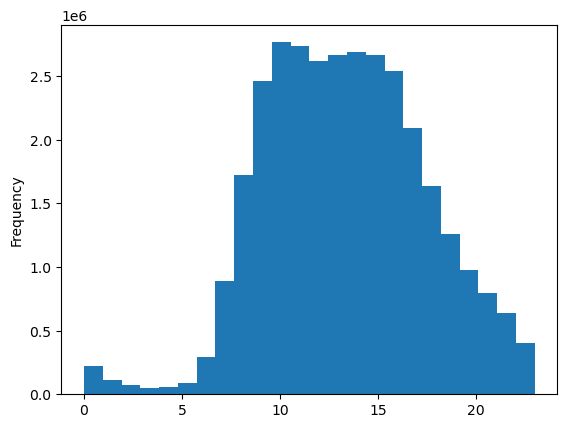

In [37]:
hist = df_ords_prods_custs ['order_hour_of_day'].plot.hist(bins = 24)

In [38]:
hist.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'hist_hod_orders.png'))

In [39]:
bar.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'bar_loyal_orders.png'))

In [40]:
line.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'line_hod_prices.png'))

In [41]:
line2.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'line_age_dependants.png'))

In [42]:
scatter.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'scatter_age_income.png'))